In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [3]:
df = pd.read_csv('diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [43]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
data = np.hstack((X,np.reshape(y,(-1,1))))
transformed_df = pd.DataFrame(data,columns=df.columns)

In [47]:
over  = RandomOverSampler()
X,y = over.fit_resample(X,y)
data = np.hstack((X,np.reshape(y,(-1,1))))
transformed_df = pd.DataFrame(data,columns=df.columns)

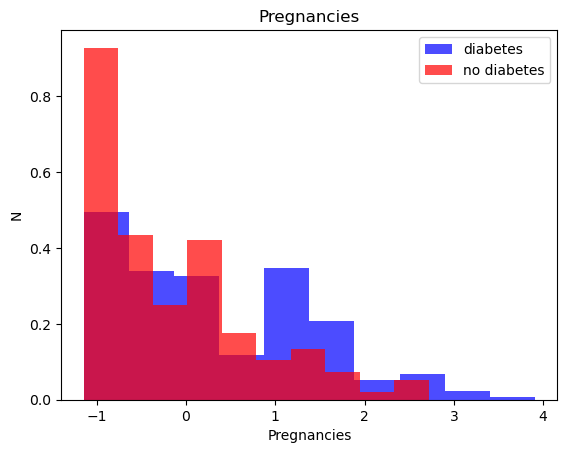

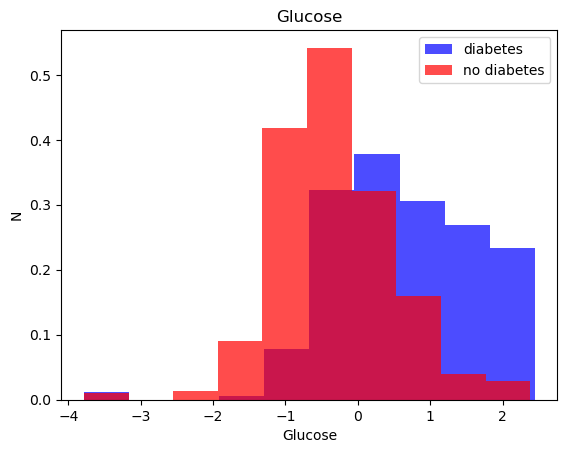

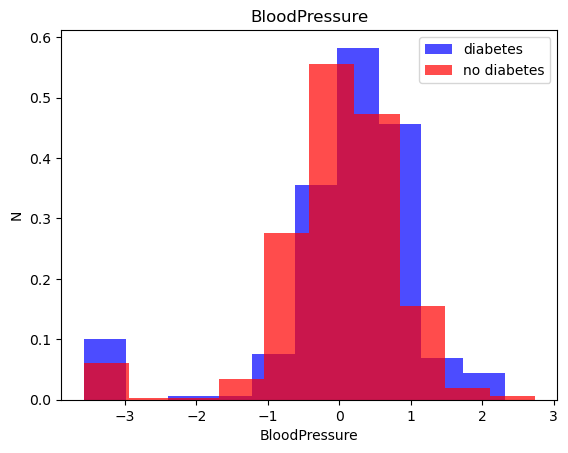

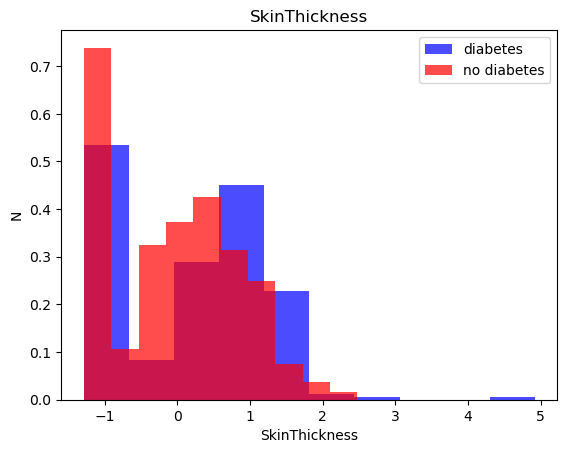

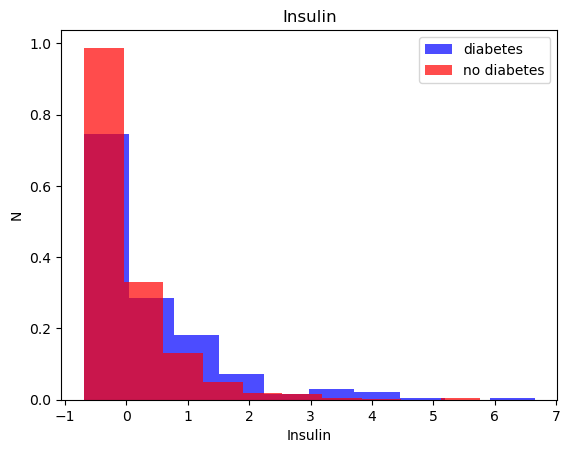

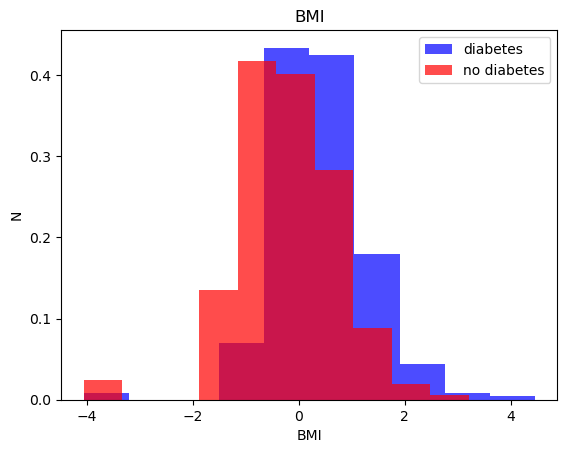

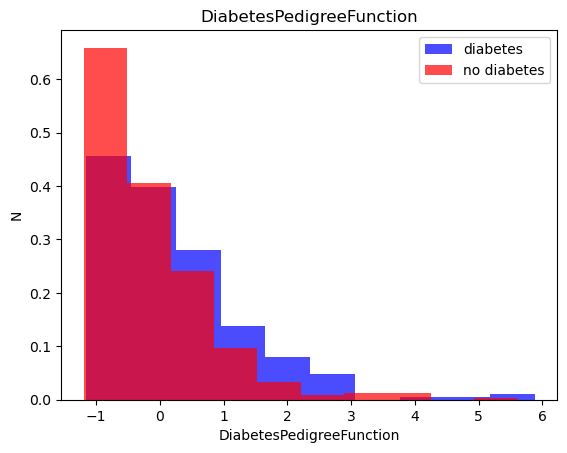

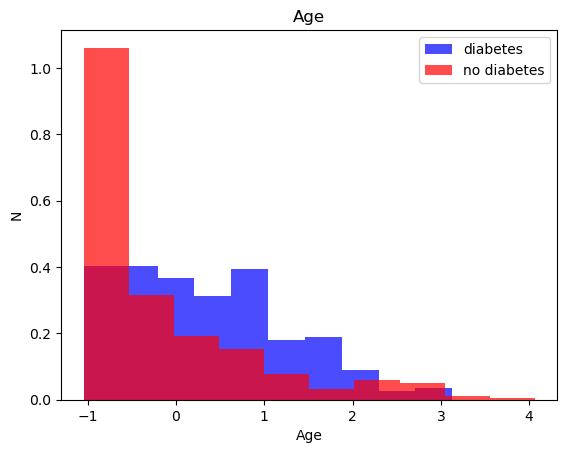

In [44]:
for i in range(len(transformed_df.columns[:-1])):
    label = transformed_df.columns[i]
    plt.hist(transformed_df[transformed_df['Outcome']==1][label],color='blue',label='diabetes',alpha=0.7,density=True)
    plt.hist(transformed_df[transformed_df['Outcome']==0][label],color='red',label='no diabetes',alpha=0.7,density=True)
    plt.title(label)
    plt.ylabel('N')
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [48]:
# diabetes positives
len(transformed_df[transformed_df['Outcome']==1])

500

In [49]:
# diabetes negatives
len(transformed_df[transformed_df['Outcome']==0])

500

In [50]:
X = transformed_df[transformed_df.columns[:-1]].values
y= transformed_df[transformed_df.columns[-1]].values

In [51]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 1.23388019,  0.09719231,  0.35643175, ..., -0.41789153,
         0.6496991 ,  1.59617091],
       [-1.14185152,  0.31627232, -3.57259724, ...,  1.42243753,
        -0.60969039, -0.61611067],
       [-1.14185152, -0.81042491,  0.8217115 , ...,  0.6863059 ,
        -0.67915312, -0.78628618]])

In [52]:

X_train,X_temp,y_train,y_temp=train_test_split(X,y,test_size=0.4,random_state=0)
X_valid,X_test,y_valid,y_test=train_test_split(X_temp,y_temp,test_size=0.5,random_state=0)

In [53]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [54]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001),
             loss = tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])


In [55]:
model.evaluate(X_train,y_train)

19/19 [==============================] - 1s 3ms/step - loss: 0.7154 - accuracy: 0.5050


[0.7154119610786438, 0.5049999952316284]

In [56]:
model.evaluate(X_valid,y_valid)

7/7 [==============================] - 0s 3ms/step - loss: 0.7436 - accuracy: 0.3900


[0.7435867786407471, 0.38999998569488525]

In [57]:
model.fit(X_train,y_train,batch_size=16,epochs=20,validation_data=(X_valid,y_valid))

Epoch 1/20
38/38 [==============================] - 1s 9ms/step - loss: 0.6931 - accuracy: 0.5050 - val_loss: 0.6881 - val_accuracy: 0.4450
Epoch 2/20
38/38 [==============================] - 0s 5ms/step - loss: 0.6518 - accuracy: 0.5900 - val_loss: 0.6555 - val_accuracy: 0.6250
Epoch 3/20
38/38 [==============================] - 0s 5ms/step - loss: 0.6215 - accuracy: 0.7050 - val_loss: 0.6214 - val_accuracy: 0.6900
Epoch 4/20
38/38 [==============================] - 0s 6ms/step - loss: 0.5929 - accuracy: 0.7233 - val_loss: 0.5915 - val_accuracy: 0.7300
Epoch 5/20
38/38 [==============================] - 0s 5ms/step - loss: 0.5701 - accuracy: 0.7200 - val_loss: 0.5624 - val_accuracy: 0.7400
Epoch 6/20
38/38 [==============================] - 0s 5ms/step - loss: 0.5506 - accuracy: 0.7333 - val_loss: 0.5408 - val_accuracy: 0.7700
Epoch 7/20
38/38 [==============================] - 0s 5ms/step - loss: 0.5362 - accuracy: 0.7317 - val_loss: 0.5248 - val_accuracy: 0.7650
Epoch 8/20
38/38 [==

In [58]:
model.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.4926 - accuracy: 0.7450


[0.49256932735443115, 0.7450000047683716]